In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [58]:
# Load the dataset
data = pd.read_csv(r'E:\3rd Year 1st semi\Fdm\FDM_Project\Strock Prediction\Dataset\healthcare-dataset-stroke-data.csv')

print("No of columns in the data : ", len(data.columns))
print("No of rows in the data : ", len(data))
print("\nFirst 5 Rows of the Data:")
data.head()

No of columns in the data :  12
No of rows in the data :  5110

First 5 Rows of the Data:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
# Data overview
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [60]:
# Basic statistics of numerical features
print("\nStatistical Summary:")
data.describe()  


Statistical Summary:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [61]:
# Check for missing values
missing_data = data.isnull().sum()
print("\nMissing Data in Each Column:")
print(missing_data)


Missing Data in Each Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


##### KNN Imputer: It searches for the 'k' closest rows (neighbors) in the dataset based on features that aren't missing and uses their values to fill in the missing 'bmi'.
##### Advantages: This method considers the relationship between the missing value and the other features in the dataset, making it smarter than just using the mean or median.

In [62]:
from sklearn.impute import KNNImputer

# Create a KNN imputer with k neighbors (default k=5)
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the 'bmi' column
data[['bmi']] = imputer.fit_transform(data[['bmi']])

In [63]:
# Check if all missing values are handled
print("\nMissing Data After Imputation:")
print(data.isnull().sum())


Missing Data After Imputation:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


###### Given that your dataset contains multiple categorical features that are nominal, One-Hot Encoding is the most appropriate choice. It ensures that your model captures the relationships within the data without introducing misleading ordinal implications, ultimately leading to more accurate predictions.

In [68]:
# Remove 'id' column as it's not useful for prediction
data.drop('id', axis=1, inplace=True)

In [84]:
# Apply One-Hot Encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check for all numerical features after encoding (which includes binary columns)
numerical_features = data_encoded.columns  # No need to limit to 'number' type, as the encoded categorical columns are binary

# Print the list of columns after One-Hot Encoding
print("All Features in the DataFrame After Encoding:")
print(numerical_features)


All Features in the DataFrame After Encoding:
Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [85]:
# Display the first few rows of the transformed DataFrame
print("\nTransformed DataFrame with One-Hot Encoding:")
print(data_encoded.head())


Transformed DataFrame with One-Hot Encoding:
    age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   

   work_type_Private  work_type_Self-emp

In [86]:
print(data_encoded.dtypes)


age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Male                          bool
gender_Other                         bool
ever_married_Yes                     bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
Residence_type_Urban                 bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
dtype: object


In [87]:
# Check for duplicates and remove them
print("\nNumber of Duplicate Rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)


Number of Duplicate Rows: 0


In [88]:
# Describe statistics after encoding
print("\nStatistical Summary After Encoding:")
print(data_encoded.describe())


Statistical Summary After Encoding:
               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  5110.000000  5110.000000  
mean     28.893237     0.048728  
std       7.698018     0.215320  
min      10.300000     0.000000  
25%      23.800000     0.000000  
50%      28.400000     0.000000  
75%      32.800000     0.000000  
max      97.600000     1.000000  


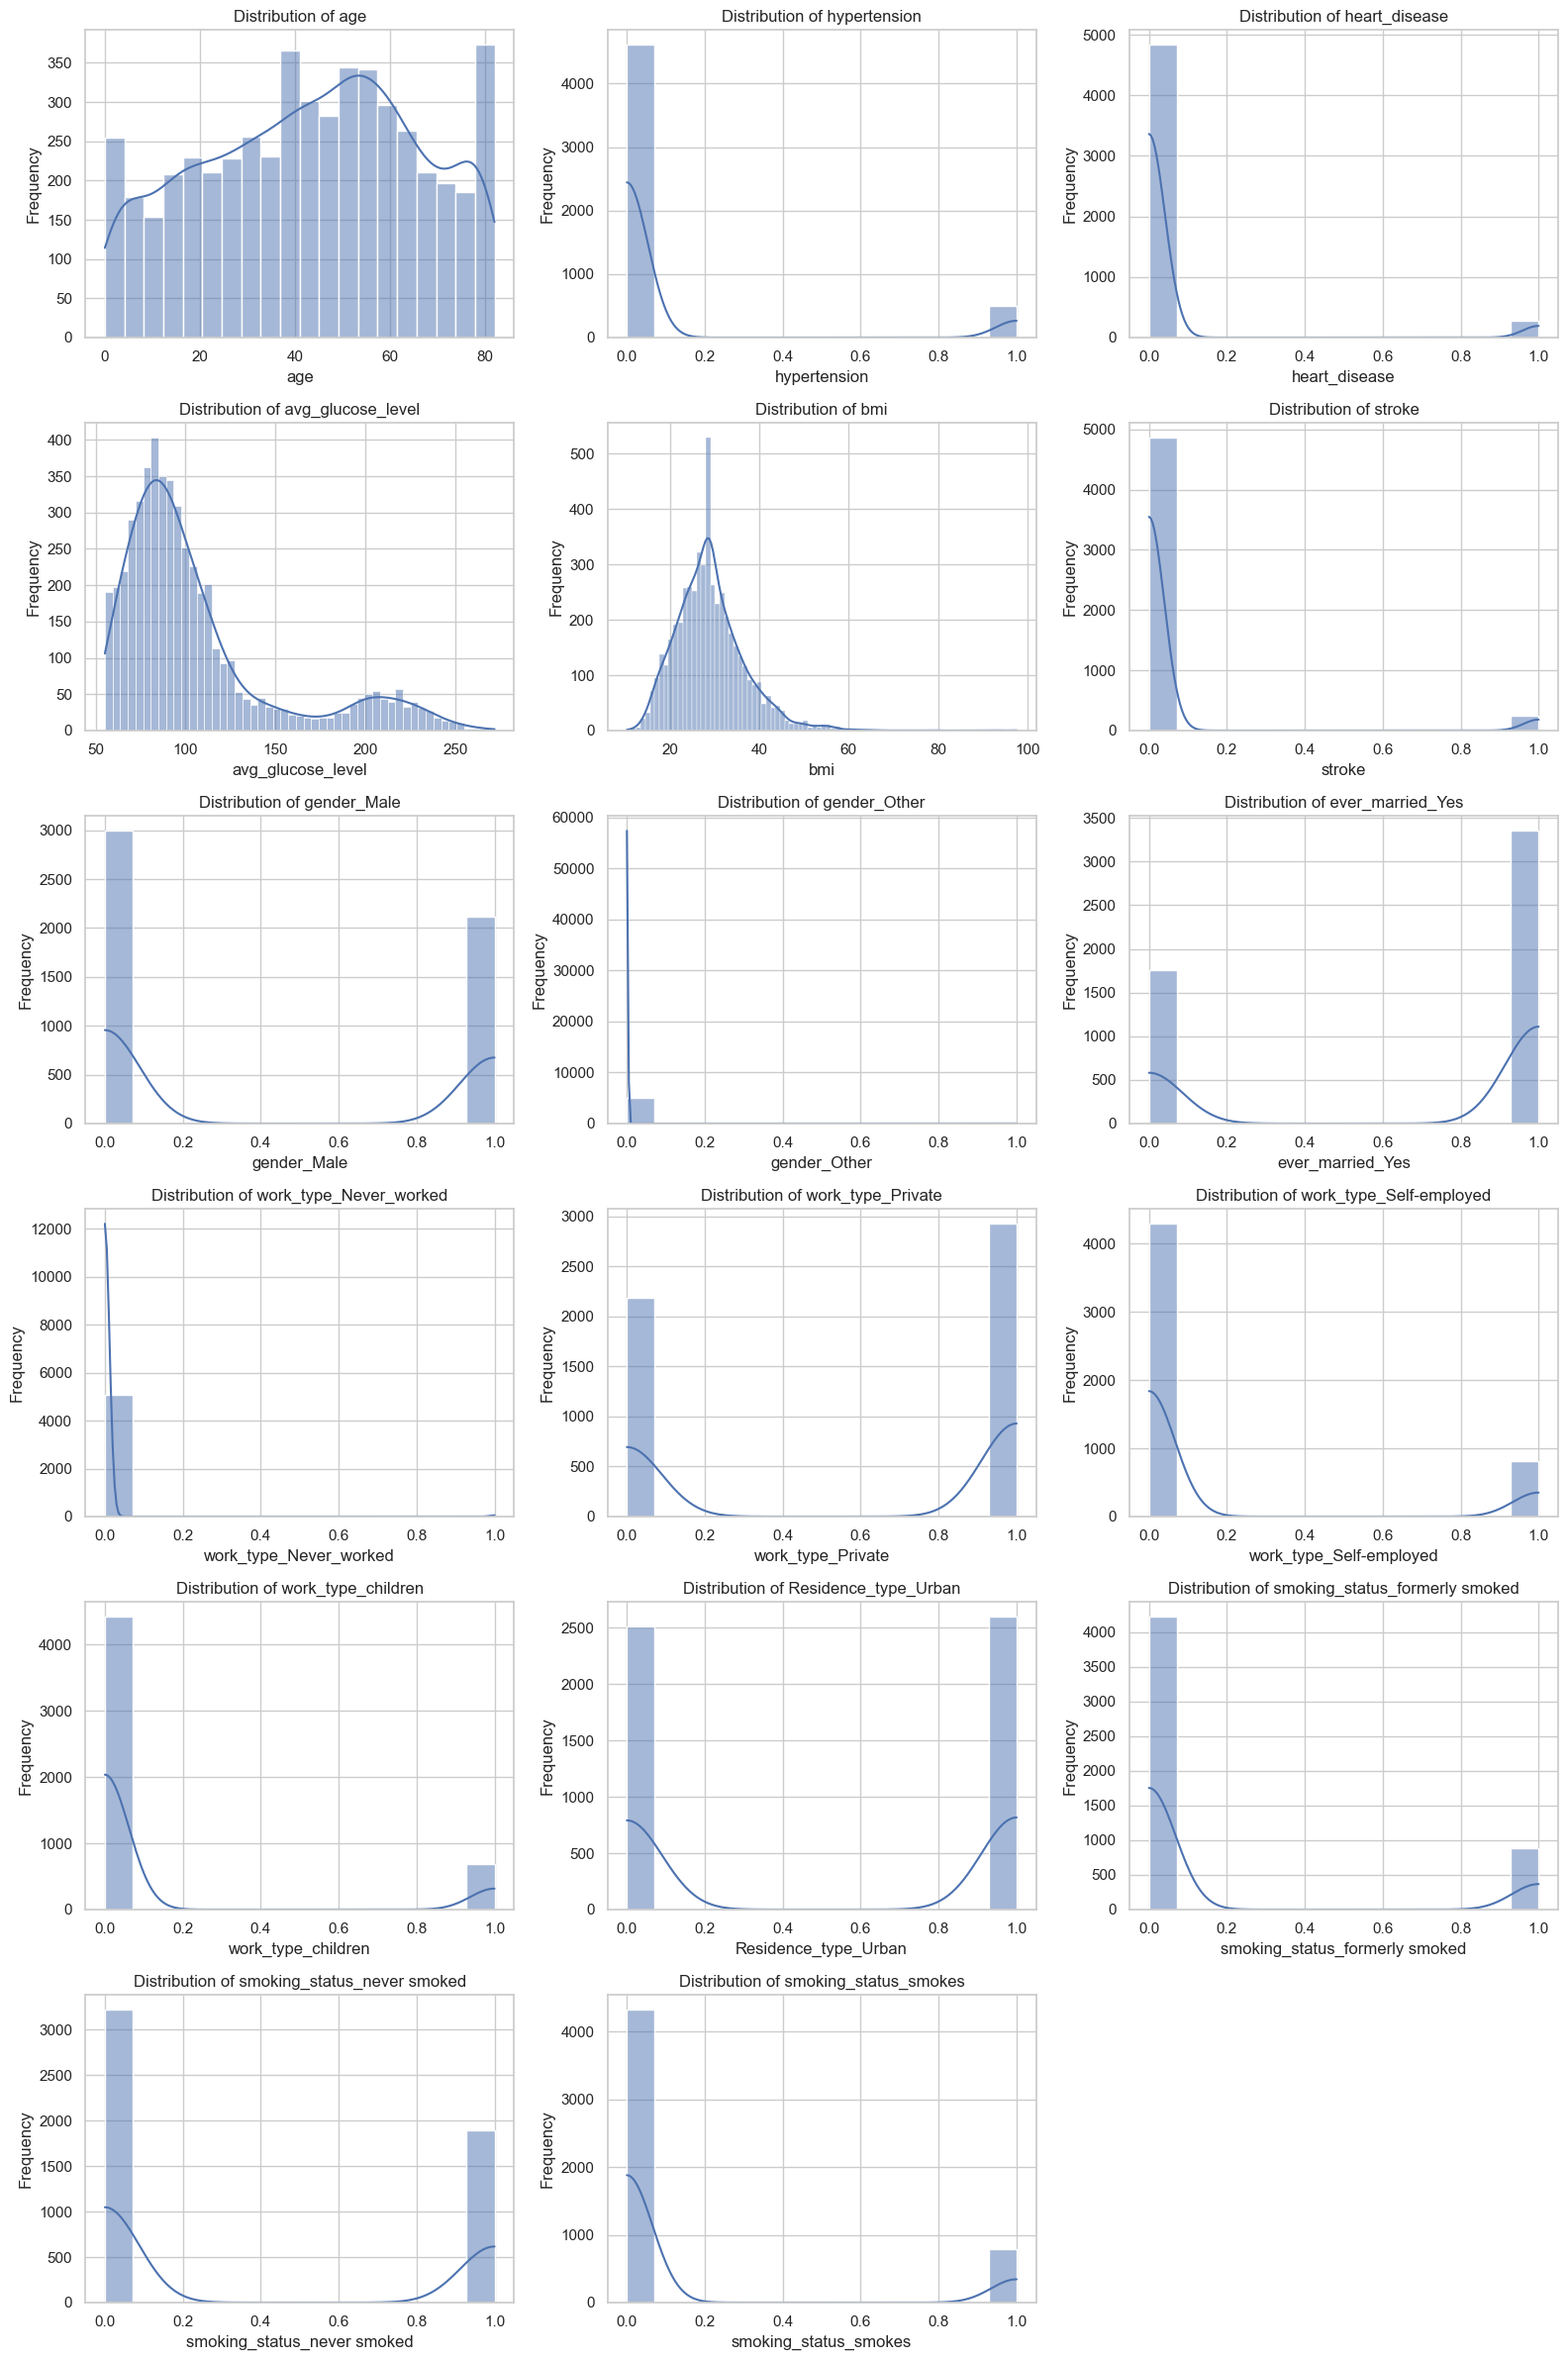

In [89]:

# Calculate the number of features and determine grid size
num_features = len(numerical_features)
cols = 3  # Number of columns for the subplot
rows = (num_features // cols) + (num_features % cols > 0)  # Calculate rows needed

plt.figure(figsize=(16, 4 * rows))

# Create histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data_encoded[feature], kde=True)  # Use data_encoded instead of data_selected_df
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

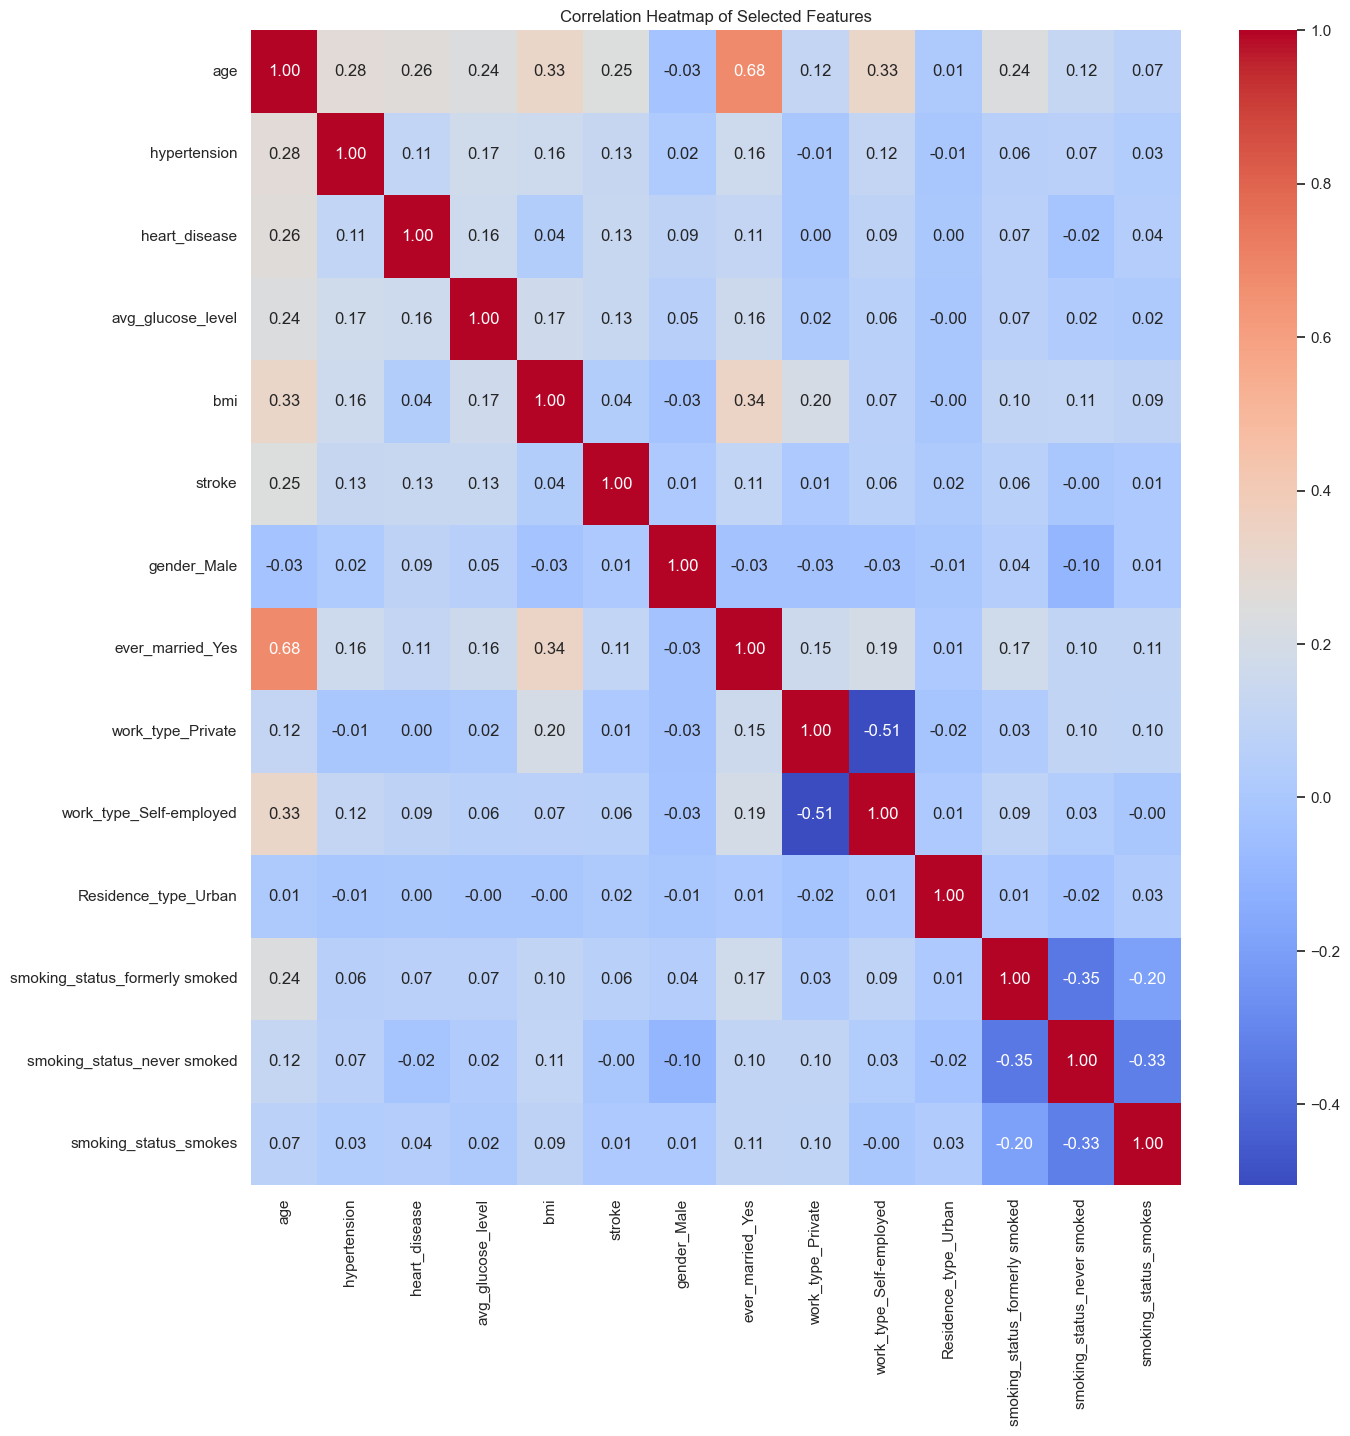

In [91]:
# List of features you are interested in
selected_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke',
                    'gender_Male', 'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed',
                    'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked',
                    'smoking_status_smokes']

# Calculate correlation matrix for selected columns
correlation_matrix = data_encoded[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()


In [92]:
# Separate features and target variable
X = data.drop(columns=['stroke'])  # Features (independent variables)
y = data['stroke']  # Target (dependent variable)

In [93]:
# Split the dataset: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting datasets
print("Training set shape (X_train):", X_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Test labels shape (y_test):", y_test.shape)

Training set shape (X_train): (4088, 10)
Test set shape (X_test): (1022, 10)
Training labels shape (y_train): (4088,)
Test labels shape (y_test): (1022,)


In [ ]:
# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))


